# Ensemble Code 4 - Regression Test

### 필요한 모듈을 불러온다

In [1]:
%matplotlib inline  
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
import collections
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
print("Module Ready!")

Module Ready!


In [2]:
#############################
RANDOM_STATE = 1026
#############################

def mean_absolute_percentage_error(Data):
    return(np.mean(np.abs(Data[:, 1]-Data[:, 0])/Data[:, 1]))

def Valid_Index(Data,Name):
    return(pd.DataFrame(pd.Series({'MAE':mean_absolute_error(Data[:, 0], Data[:, 1]),
               'MSE': mean_squared_error(Data[:, 0], Data[:, 1]),
               'MAPE': mean_absolute_percentage_error(Data),
               'Model': Name})).transpose())   


# 사용할 Personal Loan 데이터셋을 불러옵니다.
Rawdata = pd.read_csv('dataset/mortgage.csv')
# Print Column names
print("'mortgage' data column name : ", list(Rawdata.columns.values))
# Allocate column index based on Input and Output varaibles

Input_Column_Index = range(0,15)
Target_Column_Index = np.array([15])

# 같은 데이터셋을 사용하기 위해서 난수를 고정합니다.
np.random.seed(100)
Train_Index = np.random.choice(np.shape(Rawdata)[0],int(np.shape(Rawdata)[0]*0.8),replace=False)

# Input variable과 Output variable을 Numpy array로 변환합니다.
Rawdata_Input = np.array(Rawdata)[:,Input_Column_Index]
Rawdata_Output = np.array(Rawdata)[:,Target_Column_Index]

# Training data와 Test data를 나누어 줍니다.
Train_Input = Rawdata_Input[Train_Index,:]
Train_Output = Rawdata_Output[Train_Index,:]
Test_Input = Rawdata_Input[np.delete(range(np.shape(Rawdata)[0]),Train_Index),:]
Test_Output = Rawdata_Output[np.delete(range(np.shape(Rawdata)[0]),Train_Index),:]
print('Data partition complete! \nTrain_Input shape :',np.shape(Train_Input),'\nTrain_Output shape :',np.shape(Train_Output))
print('Test_Input shape :',np.shape(Test_Input),'\nTest_Output shape :',np.shape(Test_Output))

def standardization(Data,Data2):
    return ((Data - np.mean(Data2, axis=0)) / np.std(Data2, axis=0))

Train_Input_Normalized = copy.deepcopy(standardization(Train_Input,Train_Input))
Test_Input_Normalized = copy.deepcopy(standardization(Test_Input,Train_Input))
print("standardization complete!")

'mortgage' data column name :  ['OneMonthCDRate', 'OneY.CMaturityRate', 'ThreeM.Rate.AuctionAverage', 'ThreeM.Rate.SecondaryMarket', 'ThreeY.CMaturityRate', 'FiveY.CMaturityRate', 'BankCredit', 'Currency', 'DemandDeposits', 'FederalFunds', 'MoneyStock', 'CheckableDeposits', 'LoansLeases', 'SavingsDeposits', 'TradeCurrencies', 'ThirtyY.CMortgageRate']
Data partition complete! 
Train_Input shape : (839, 15) 
Train_Output shape : (839, 1)
Test_Input shape : (210, 15) 
Test_Output shape : (210, 1)
standardization complete!


# Model1. Neural network

In [3]:
def NeuralNetwork(HIDDEN_LAYER,Train_Input,TR_OUTPUT,Val_Input,Val_Output):
    MLP=MLPRegressor(hidden_layer_sizes=HIDDEN_LAYER,max_iter=2000 ,random_state =RANDOM_STATE).fit(Train_Input,TR_OUTPUT[:,0])
    Predict_Value = MLP.predict(Val_Input)
    return(np.concatenate((Predict_Value[:,np.newaxis],Val_Output),axis=1))


Model1=NeuralNetwork(HIDDEN_LAYER=[20,20,20],Train_Input=Train_Input_Normalized,
              TR_OUTPUT=Train_Output,Val_Input=Test_Input_Normalized,Val_Output=Test_Output)

Model1_Results=Valid_Index(Model1,'ANN')
Model1_Results

,MAE,MAPE,MSE,Model
0,0.137146,0.021833,0.0315289,ANN


# Model2. Bagging Neural network

In [4]:
def B_NeuralNetwork(HIDDEN_LAYER,Train_Input,TR_OUTPUT,Val_Input,Val_Output):
    MLP=MLPRegressor(hidden_layer_sizes=HIDDEN_LAYER,max_iter=2000 ,random_state =RANDOM_STATE)
    BMLP = BaggingRegressor(n_estimators=30, base_estimator=MLP, 
                             random_state=RANDOM_STATE, n_jobs=-1).fit(Train_Input, TR_OUTPUT[:, 0])
    Predict_Value = BMLP.predict(Val_Input)
    return(np.concatenate((Predict_Value[:,np.newaxis],Val_Output),axis=1))

Model2=B_NeuralNetwork(HIDDEN_LAYER=[10,10,10],Train_Input=Train_Input_Normalized,
              TR_OUTPUT=Train_Output,Val_Input=Test_Input_Normalized,Val_Output=Test_Output)

Model2_Results=Valid_Index(Model2,'B_ANN')
Model2_Results

,MAE,MAPE,MSE,Model
0,0.13331,0.0194384,0.0329916,B_ANN


# Model3. RandomForest

In [5]:
def RandomForest(NUMBER,Train_Input,TR_OUTPUT,Val_Input,Val_Output):
    RF=RandomForestRegressor(n_estimators=NUMBER,
                           max_features="sqrt",
                           random_state=RANDOM_STATE).fit(Train_Input,TR_OUTPUT[:,0])
    Predict_Value = RF.predict(Val_Input)
    return(np.concatenate((Predict_Value[:,np.newaxis],Val_Output),axis=1))    

Model3=RandomForest(NUMBER=200,Train_Input=Train_Input_Normalized,
              TR_OUTPUT=Train_Output,Val_Input=Test_Input_Normalized,Val_Output=Test_Output)

Model3_Results=Valid_Index(Model3,'RF')
Model3_Results

,MAE,MAPE,MSE,Model
0,0.0752348,0.00964126,0.0158675,RF


# Model4. Bagging Tree

In [6]:
def B_Tree(NUMBER,Train_Input,TR_OUTPUT,Val_Input,Val_Output):
    Tree = DecisionTreeRegressor(max_depth=NUMBER, random_state=RANDOM_STATE).fit(Train_Input, TR_OUTPUT[:, 0])
    BMLP = BaggingRegressor(n_estimators=30, base_estimator=Tree, random_state=RANDOM_STATE, n_jobs=-1).fit(Train_Input, TR_OUTPUT[:, 0])
    Predict_Value = BMLP.predict(Val_Input)
    return(np.concatenate((Predict_Value[:,np.newaxis],Val_Output),axis=1))


Model4=B_Tree(NUMBER=6,Train_Input=Train_Input_Normalized,
              TR_OUTPUT=Train_Output,Val_Input=Test_Input_Normalized,Val_Output=Test_Output)

Model4_Results=Valid_Index(Model4,'B_Tree')
Model4_Results

,MAE,MAPE,MSE,Model
0,0.110823,0.0157357,0.0248484,B_Tree


# Model5. Gradient Boosting Machine

In [7]:
def GBM(NUMBER,Train_Input,TR_OUTPUT,Val_Input,Val_Output):
    gbm=GradientBoostingRegressor(n_estimators=NUMBER,random_state=RANDOM_STATE).fit(Train_Input,TR_OUTPUT[:,0])
    Predict_Value = gbm.predict(Val_Input)
    return(np.concatenate((Predict_Value[:,np.newaxis],Val_Output),axis=1))

Model5=GBM(NUMBER=300,Train_Input=Train_Input_Normalized,
              TR_OUTPUT=Train_Output,Val_Input=Test_Input_Normalized,Val_Output=Test_Output)

Model5_Results=Valid_Index(Model5,'GBM')
Model5_Results

,MAE,MAPE,MSE,Model
0,0.0736954,0.00962527,0.0122758,GBM


# Results

In [8]:
Results=pd.concat((Model1_Results,Model2_Results,Model3_Results,
          Model4_Results,Model5_Results),axis=0)
Results = Results.sort_values(by=['MSE'],ascending=True)
Results

,MAE,MAPE,MSE,Model
0,0.0736954,0.00962527,0.0122758,GBM
0,0.0752348,0.00964126,0.0158675,RF
0,0.110823,0.0157357,0.0248484,B_Tree
0,0.137146,0.021833,0.0315289,ANN
0,0.13331,0.0194384,0.0329916,B_ANN


# Feature Importance

In [9]:
Use_Feature_Name=list(np.array(list(Rawdata.columns.values))[range(15)])
OP_RF=RandomForestRegressor(n_estimators=200,
                           max_features="sqrt",
                           random_state=RANDOM_STATE).fit(Train_Input_Normalized,Train_Output[:,0])
OP_GBM=gbm=GradientBoostingRegressor(n_estimators=300,random_state=RANDOM_STATE).fit(Train_Input_Normalized,Train_Output[:,0])
def plot_feature_importances(model):
    n_features = np.shape(Train_Input_Normalized)[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Use_Feature_Name)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.rcParams.update({'font.size': 8})

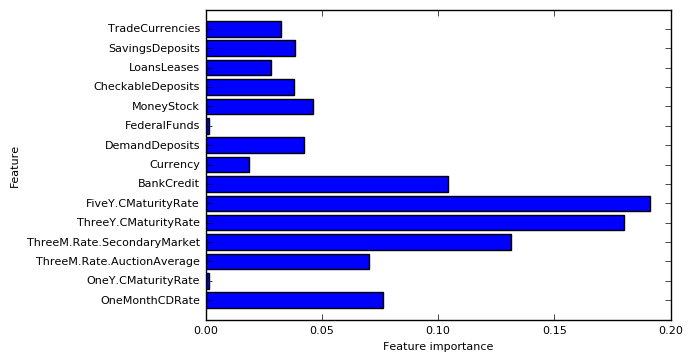

In [10]:
plot_feature_importances(OP_RF)

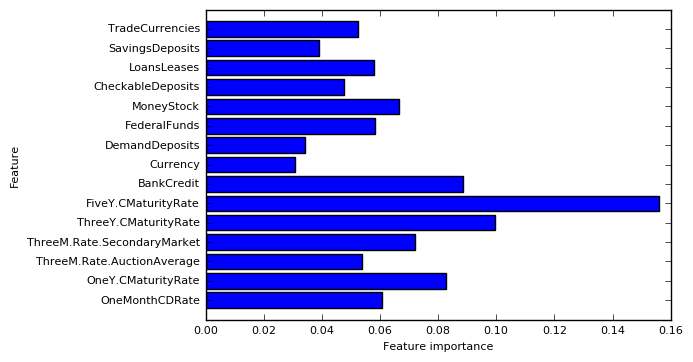

In [11]:
plot_feature_importances(OP_GBM)